In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

/Users/conquerorbala/miniconda3/envs/anlpa1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


16:46:20 - cmdstanpy - INFO - Chain [1] start processing
16:46:20 - cmdstanpy - INFO - Chain [1] done processing


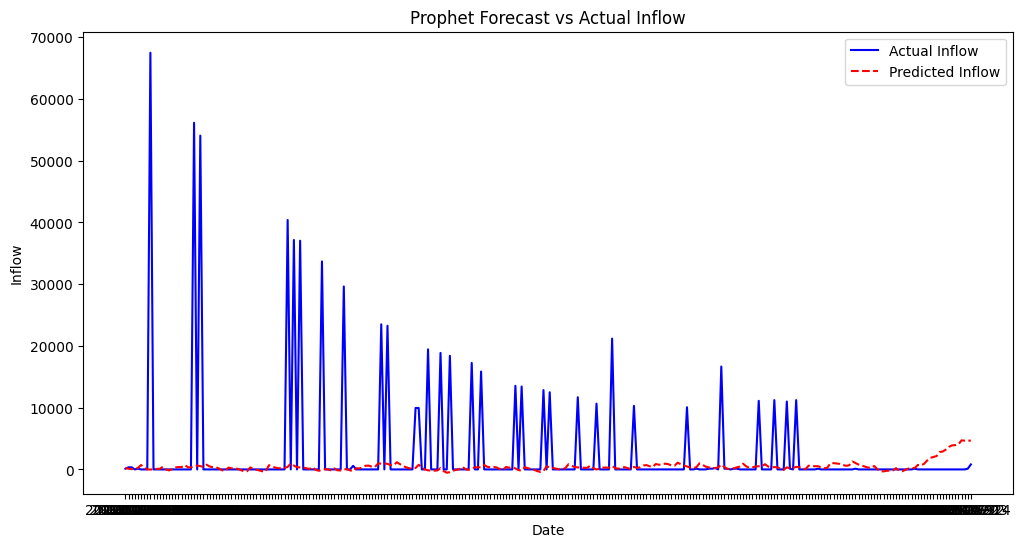

Mean Absolute Error (MAE): 2985.0447920778843
Comparison between actual and predicted values:
           ds           y        yhat
0  2022-10-23  115.740741  237.951277
1  2022-10-24  347.222222  100.386266
2  2022-10-25  347.222222   58.168314
3  2022-10-26    0.000000   93.839259
4  2022-10-27  115.740741  227.919370


In [7]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def forecast_and_evaluate_prophet(train_file, val_file, test_file):
    # Load the data
    df_train = pd.read_csv(train_file)
    df_val = pd.read_csv(val_file)
    df_test = pd.read_csv(test_file)

    # Combine train and validation sets
    df_train_val = pd.concat([df_train, df_val], ignore_index=True)

    # Rename columns for Prophet
    df_train_val = df_train_val.rename(columns={'date': 'ds', 'inflow': 'y'})
    df_test = df_test.rename(columns={'date': 'ds', 'inflow': 'y'})

    # Data Cleaning
    # Handle missing values
    df_train_val = df_train_val.dropna()
    df_test = df_test.dropna()

    # Handle outliers (optional)
    # Remove data points beyond 3 standard deviations
    df_train_val = df_train_val[
        (df_train_val['y'] - df_train_val['y'].mean()).abs() <= (3 * df_train_val['y'].std())
    ]

    # Initialize Prophet model with additional seasonality if needed
    model = Prophet()

    # Add monthly seasonality if data shows monthly patterns
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    # Fit the model
    model.fit(df_train_val)

    # Create a future dataframe for the test period
    future = df_test[['ds']].copy()

    # Make predictions
    forecast = model.predict(future)

    # Merge forecast with test data
    forecast_results = df_test.copy()
    forecast_results['yhat'] = forecast['yhat'].values

    # Evaluate performance
    mae = mean_absolute_error(forecast_results['y'], forecast_results['yhat'])

    # Plot the forecast vs actual values
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_results['ds'], forecast_results['y'], label="Actual Inflow", color='blue')
    plt.plot(forecast_results['ds'], forecast_results['yhat'], label="Predicted Inflow", color='red', linestyle='--')
    plt.title("Prophet Forecast vs Actual Inflow")
    plt.xlabel("Date")
    plt.ylabel("Inflow")
    plt.legend()
    plt.show()

    # Return forecast results and MAE
    return forecast_results[['ds', 'y', 'yhat']], mae

# Paths to your CSV files
train_file = 'train.csv'  # Path to your train.csv
val_file = 'val.csv'      # Path to your val.csv
test_file = 'test.csv'    # Path to your test.csv

# Call the function and get the results
forecast_results, mae = forecast_and_evaluate_prophet(train_file, val_file, test_file)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print("Comparison between actual and predicted values:")
print(forecast_results.head())
